**Part I: Find predictors of influence**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
# read data
data = pd.read_csv('train.csv')
data.head()

FileNotFoundError: ignored

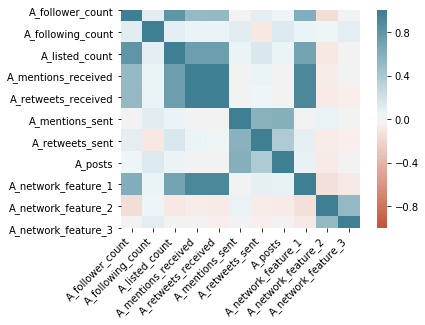

In [0]:
# test the correlation
a = data.iloc[:,1:12]
corr = a.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [0]:
corr

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3
A_follower_count,1.000000,0.115834,0.815952,0.511609,0.521888,0.018456,0.094799,0.042993,0.622146,-0.153272,-0.036082
A_following_count,0.115834,1.000000,0.100696,0.058140,0.051819,0.111342,-0.083883,0.138373,0.047236,0.043642,0.097762
A_listed_count,0.815952,0.100696,1.000000,0.734589,0.747752,0.061729,0.155630,0.053975,0.705268,-0.080056,-0.038574
A_mentions_received,0.511609,0.058140,0.734589,1.000000,0.990021,0.023336,0.050100,0.026512,0.922340,-0.062407,-0.038079
A_retweets_received,0.521888,0.051819,0.747752,0.990021,1.000000,0.019130,0.043846,0.033068,0.928273,-0.065266,-0.040301
A_mentions_sent,0.018456,0.111342,0.061729,0.023336,0.019130,1.000000,0.582630,0.607040,0.032608,0.064242,0.035437
A_retweets_sent,0.094799,-0.083883,0.155630,0.050100,0.043846,0.582630,1.000000,0.379318,0.081908,-0.048761,-0.042127
A_posts,0.042993,0.138373,0.053975,0.026512,0.033068,0.607040,0.379318,1.000000,0.074683,-0.066125,-0.018347
A_network_feature_1,0.622146,0.047236,0.705268,0.922340,0.928273,0.032608,0.081908,0.074683,1.000000,-0.118138,-0.071711
A_network_feature_2,-0.153272,0.043642,-0.080056,-0.062407,-0.065266,0.064242,-0.048761,-0.066125,-0.118138,1.000000,0.520617


In [0]:
# drop mentions_received and network_feature, keep retweets_received
df = data.drop(['A_mentions_received','A_network_feature_1','B_mentions_received','B_network_feature_1'],axis = 1)

In [0]:
df.iloc[:,1:10]

,A_follower_count,A_following_count,A_listed_count,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_2,A_network_feature_3
0,228,302,3,0.100503,0.100503,0.100503,0.362150,166.500000,11355.000000
1,21591,1179,228,25.798292,5.709329,1.111159,5.176620,18.442971,1330.366048
2,7310,1215,101,9.556347,5.361519,0.591206,3.589718,68.927835,5999.896907
3,20,7,2,0.277306,1.331508,0.100503,2.830627,2.000000,96.166667
4,45589,862,2641,36.998884,27.881768,3.333492,23.861282,127.404293,2833.847943
...,...,...,...,...,...,...,...,...,...
5495,41765,185,1356,282.858500,76.809514,5.392171,104.438625,50.132042,3585.789866
5496,112,243,5,0.100503,0.100503,0.100503,0.603177,96.600000,1414.200000
5497,15385,673,747,22.321945,6.946233,0.341936,6.503977,152.495098,3286.617647
5498,265258,209,551,457.648550,5.460985,0.100503,7.498126,3.826314,506.692136


In [0]:
df.iloc[:,10:19]

,B_follower_count,B_following_count,B_listed_count,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_2,B_network_feature_3
0,34463,29808,1689,3.984029,8.204331,0.332423,6.988815,75.530303,1916.893939
1,39262,848,1610,8.943607,3.227677,0.564343,1.070321,132.030675,2931.515337
2,3622,482,206,0.354379,0.603202,0.100503,0.603202,10.333333,277.333333
3,19562,17637,278,390.293681,27.552040,7.167557,32.101906,23.469296,1395.845634
4,7554,1711,181,3.581661,6.764657,1.119727,4.563246,48.500000,1993.627907
...,...,...,...,...,...,...,...,...,...
5495,804394,1370,15143,5013.642295,22.683131,2.385538,18.420981,21.324988,1413.825398
5496,794,479,8,0.306073,0.100503,0.100503,1.621981,49.000000,4969.000000
5497,7554,1711,181,3.581661,6.764657,1.119727,4.563246,48.500000,1993.627907
5498,322682,37601,22232,42.330221,6.849227,1.345073,4.359865,234.338068,7168.464489


In [0]:
# test if keep all A,B columns, not the best option

# x = df.drop(['Choice'],axis=1)
# y = data['Choice']

In [0]:
# test A-B, the best
x = pd.DataFrame(df.iloc[:,1:10].values - df.iloc[:,10:19].values)
x.columns = ['A/B_follower_count','A/B_following_count','A/B_listed_count','A/B_retweets_received','A/B_mentions_sent',
              'A/B_retweets_sent','A/B_posts','A/B_network_feature_2','A/B_network_feature_3']
y= data['Choice']

In [0]:
# test A/B, not the best

# df_2 = df[(df.iloc[:,1:] != 0).all(1)]
# x = pd.DataFrame(df_2.iloc[:,1:10].values / df_2.iloc[:,10:20].values)
# x.columns = ['A/B_follower_count','A/B_following_count','A/B_listed_count','A/B_retweets_received','A/B_mentions_sent',
#               'A/B_retweets_sent','A/B_posts','A/B_network_feature_2','A/B_network_feature_3']
# y= df_2['Choice']

In [0]:
x.isnull().values.any()

False

In [0]:
# split data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [0]:
# logistic regression

import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.576259
         Iterations 7
                           Results: Logit
Model:                Logit            Pseudo R-squared: 0.168      
Dependent Variable:   Choice           AIC:              4455.1941  
Date:                 2020-02-04 10:22 BIC:              4511.4965  
No. Observations:     3850             Log-Likelihood:   -2218.6    
Df Model:             8                LL-Null:          -2667.0    
Df Residuals:         3841             LLR p-value:      2.7945e-188
Converged:            1.0000           Scale:            1.0000     
No. Iterations:       7.0000                                        
--------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
--------------------------------------------------------------------
A/B_follower_count    -0.0000   0.0000 -1.5098 0.1311 -0.0000 0.0000
A/B_following_count    0.000

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.feature_selection import RFE

clf = LogisticRegression()
clf = RFE(clf, 5)
clf.fit(x_train,y_train)
print(clf.support_)
print(clf.ranking_)

y_pred = clf.predict(x_test)
print("Training Accuracy :", clf.score(x_train, y_train))
print("Testing Accuracy :", clf.score(x_test, y_test))

confusion_matrix(y_test, y_pred)

[False False  True False  True  True  True  True False]
[5 4 1 3 1 1 1 1 2]
Training Accuracy : 0.7371428571428571
Testing Accuracy : 0.743030303030303


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([[602, 227],
       [197, 624]])

In [0]:
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       829
           1       0.73      0.76      0.75       821

    accuracy                           0.74      1650
   macro avg       0.74      0.74      0.74      1650
weighted avg       0.74      0.74      0.74      1650



0.7431124184370175

In [0]:
# select out the five important feature in logistic regression

cols = ['A/B_listed_count','A/B_mentions_sent','A/B_retweets_sent','A/B_posts','A/B_network_feature_2']
x_train2=x_train[cols]
x_test2=x_test[cols]

logit_model=sm.Logit(y_train,x_train2)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.580835
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.162      
Dependent Variable: Choice           AIC:              4482.4268  
Date:               2020-02-04 10:23 BIC:              4513.7059  
No. Observations:   3850             Log-Likelihood:   -2236.2    
Df Model:           4                LL-Null:          -2667.0    
Df Residuals:       3845             LLR p-value:      3.5687e-185
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|  [0.025 0.975]
------------------------------------------------------------------
A/B_listed_count      0.0001   0.0000 19.0386 0.0000 0.0001 0.0001
A/B_mentions_sent     0.0103   0.0040  2.5988 0.0094 

In [0]:
clf = LogisticRegression()
clf.fit(x_train2,y_train)

y_pred = clf.predict(x_test2)
print("Training Accuracy :", clf.score(x_train2, y_train))
print("Testing Accuracy :", clf.score(x_test2, y_test))

confusion_matrix(y_test, y_pred)

Training Accuracy : 0.7371428571428571
Testing Accuracy : 0.743030303030303


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[602, 227],
       [197, 624]])

In [0]:
# random forest

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

confusion_matrix(y_test, y_pred)

Training Accuracy : 0.9789610389610389
Testing Accuracy : 0.7515151515151515


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[640, 189],
       [221, 600]])

In [0]:
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       829
           1       0.76      0.73      0.75       821

    accuracy                           0.75      1650
   macro avg       0.75      0.75      0.75      1650
weighted avg       0.75      0.75      0.75      1650



0.7514152766125631

In [0]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [0]:
feature_importances

,importance
A/B_listed_count,0.212132
A/B_follower_count,0.193142
A/B_retweets_received,0.109217
A/B_posts,0.093201
A/B_mentions_sent,0.088297
A/B_network_feature_2,0.084763
A/B_network_feature_3,0.074815
A/B_following_count,0.074040
A/B_retweets_sent,0.070393


In [0]:
# select features with importance score larger tgan 0.08

cols = ['A/B_listed_count','A/B_follower_count','A/B_retweets_received','A/B_posts','A/B_mentions_sent','A/B_network_feature_2']
x_train3 = x_train[cols]
x_test3 = x_test[cols]

model = RandomForestClassifier()
model.fit(x_train3, y_train)

y_pred = model.predict(x_test3)

print("Training Accuracy :", model.score(x_train3, y_train))
print("Testing Accuracy :", model.score(x_test3, y_test))

confusion_matrix(y_test, y_pred)

Training Accuracy : 0.9802597402597403
Testing Accuracy : 0.7478787878787879


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[634, 195],
       [221, 600]])

In [0]:
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       829
           1       0.75      0.73      0.74       821

    accuracy                           0.75      1650
   macro avg       0.75      0.75      0.75      1650
weighted avg       0.75      0.75      0.75      1650



0.7477964587597283

Training Accuracy : 0.7794805194805194
Testing Accuracy : 0.7878787878787878
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       829
           1       0.78      0.81      0.79       821

    accuracy                           0.79      1650
   macro avg       0.79      0.79      0.79      1650
weighted avg       0.79      0.79      0.79      1650

0.787961957599738


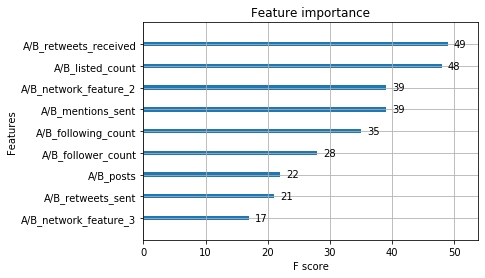

In [0]:
# XGBoost

from xgboost import XGBClassifier
from xgboost import plot_importance

neg = len(y_train)-sum(y_train==1)
pos = sum(y_train==1)

model_xg = XGBClassifier(max_depth=2, objective='binary:logistic',scale_pos_weight=neg/pos)
model_xg.fit(x_train, y_train)
y_pred=model_xg.predict(x_test)

print("Training Accuracy :", model_xg.score(x_train, y_train))
print("Testing Accuracy :", model_xg.score(x_test, y_test))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

plot_importance(model_xg, max_num_features=9)
pyplot.show()

In [0]:
confusion_matrix(y_test, y_pred)

array([[639, 190],
       [160, 661]])

Training Accuracy : 0.7766233766233767
Testing Accuracy : 0.7757575757575758
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       829
           1       0.77      0.79      0.78       821

    accuracy                           0.78      1650
   macro avg       0.78      0.78      0.78      1650
weighted avg       0.78      0.78      0.78      1650

0.7758110750812874


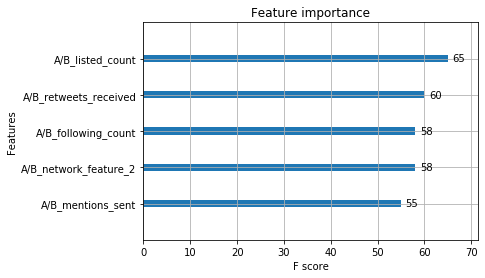

In [0]:
# select 5 most important features

cols = ['A/B_retweets_received','A/B_listed_count','A/B_network_feature_2','A/B_mentions_sent','A/B_following_count']
x_train4 = x_train[cols]
x_test4 = x_test[cols]

neg = len(y_train)-sum(y_train==1)
pos = sum(y_train==1)

model_xg = XGBClassifier(max_depth=2, objective='binary:logistic',scale_pos_weight=neg/pos)
model_xg.fit(x_train4, y_train)
y_pred=model_xg.predict(x_test4)

print("Training Accuracy :", model_xg.score(x_train4, y_train))
print("Testing Accuracy :", model_xg.score(x_test4, y_test))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

plot_importance(model_xg, max_num_features=8)
pyplot.show()

In [0]:
confusion_matrix(y_test, y_pred)

array([[634, 195],
       [175, 646]])



**Part II: Finding influencers from Twitter**

Data Collection and Parsing to form a CSV

In [0]:
import pandas as pd
import tweepy

In [0]:
api_key = 'Aj8dar7L332QDBvptAp8mVtKz'
secret_key = 'mGjaEJFk8EL4DaBiNp5TN4Zmi5d7MPPCL3g1lwPZQGk8v3d64D'
access_token = '2397096199-0LXa1ze00wodZvqcgAh4Nvro3yKqyyHSWpIEnwI'
access_token_secret = 'T5j56DBAxO3FEYoUex780YEdb4MC5dVnTu9cF9TpLWT3s'

auth = tweepy.OAuthHandler(api_key,secret_key)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit = True)

In [5]:
# get tweets based on search query
tweets = pd.DataFrame(columns = ['type','A_handle','A_follower_count','A_following_count','A_listed_count','A_posts',
                                 'A_network_feature_1','A_network_feature_2','A_network_feature_3',
                                 'B_handle','B_follower_count','B_following_count','B_listed_count','B_posts',
                                 'B_network_feature_1','B_network_feature_2','B_network_feature_3'])
tweets_raw = []
text_query = '#flatearth'
count = 5000

# Pulling individual tweets from query
for tweet in tweepy.Cursor(api.search,
                           q=text_query,
                           count=100, # number of results per page
                           result_type="recent",
                           include_entities=True).items(count): # total number of results
    try:
        tweets_raw.append(tweet)
        # Adding to list that contains all tweets    
        handle = tweet._json['user']['screen_name']
        if tweet.text[:2] == 'RT': # they are retweeting
            rt_handle = tweet._json['retweeted_status']['user']['screen_name']
            rt_followers = tweet._json['retweeted_status']['user']['followers_count']
            rt_following = tweet._json['retweeted_status']['user']['friends_count']
            rt_listed = tweet._json['retweeted_status']['user']['listed_count']
            rt_posts = tweet._json['retweeted_status']['user']['statuses_count']
            content = 'RT'
        elif False:
            # they are quoting a tweet
            pass
        else:
            rt_handle = handle
            content = 'Tweet'
        followers = tweet._json['user']['followers_count']
        following = tweet._json['user']['friends_count']
        listed = tweet._json['user']['listed_count']
        posts = tweet._json['user']['statuses_count']

        tweets = tweets.append(pd.Series({'type':content,'A_handle':handle,'A_follower_count':followers,
                                          'A_following_count':following,'A_listed_count':listed,'A_posts':posts,
                                          'B_handle':rt_handle,'B_follower_count':rt_followers,
                                          'B_following_count':rt_following,'B_listed_count':rt_listed,
                                          'B_posts':rt_posts}), ignore_index = True)
    except:
        continue

tweets.head()

,type,A_handle,A_follower_count,A_following_count,A_listed_count,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3,B_handle,B_follower_count,B_following_count,B_listed_count,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,RT,WeenieLinguini,505,2,9,62696,NaN,NaN,NaN,HiddenMountain7,16435,14670,47,9622,NaN,NaN,NaN
1,RT,WeenieLinguini,505,2,9,62696,NaN,NaN,NaN,JoeyGelman,474,1701,6,3626,NaN,NaN,NaN
2,RT,WeenieLinguini,505,2,9,62696,NaN,NaN,NaN,UnbeProductions,852,862,2,1065,NaN,NaN,NaN
3,RT,WeenieLinguini,505,2,9,62696,NaN,NaN,NaN,Constitution_NH,396,55,72,27875,NaN,NaN,NaN
4,RT,WeenieLinguini,505,2,9,62696,NaN,NaN,NaN,MI_Constitution,63,14,14,2186,NaN,NaN,NaN


Network features 1, 2, and 3 above refer to degree, betweenness and closeness. 

In [6]:
len(tweets)

4995

In [0]:
pd.DataFrame(tweets).to_csv('tweets_'+text_query.strip('#')+'.csv')

In [0]:
!cp tweets_flatearth.csv "/content/drive/My Drive/Social Media Analytics/Assignment 1"

Calculating Centrality metrics


In [0]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Social Media Analytics/Assignment 1/tweets_flatearth.csv')

In [0]:
import pandas as pd
df = pd.read_csv('tweets_flatearth.csv')

In [9]:
len(df)

4995

In [0]:

import networkx as nx
import numpy as np
import itertools

import matplotlib.pyplot as plt

In [0]:
Graph = nx.from_pandas_edgelist(df,source='B_handle',target='A_handle', edge_attr=None, create_using=nx.DiGraph())

In [12]:
print(nx.info(Graph))

Name: 
Type: DiGraph
Number of nodes: 2713
Number of edges: 3407
Average in degree:   1.2558
Average out degree:   1.2558


In [16]:
#Checking number of nodes
temp = df['A_handle'].append(df['B_handle'])
temp.drop_duplicates()

0        WeenieLinguini
5             BotSiduri
9          aspenmonkey1
10      HiddenMountain7
11      Mabdullah131807
             ...       
4723      WargrooveGame
4804        verlisifyYT
4973    LawsonIsMyVimes
4974      GeekNamedMike
4977      ItsOnlyMeMaya
Length: 2713, dtype: object

In [0]:
betweenness = nx.betweenness_centrality(Graph)
degree = nx.degree_centrality(Graph)
out_degree = nx.out_degree_centrality(Graph)
in_degree = nx.in_degree_centrality(Graph)
closeness = nx.closeness_centrality(Graph)

In [0]:
bet_df = pd.DataFrame.from_dict(betweenness, orient='index',
                       columns=['Betweenness'])
degree_df = pd.DataFrame.from_dict(degree,orient = 'index', columns = ['Degree'])
close_df = pd.DataFrame.from_dict(closeness, orient = 'index', columns = ['Closeness'])
indegree_df = pd.DataFrame.from_dict(in_degree, orient = 'index', columns = ['In Degree'])
outdegree_df = pd.DataFrame.from_dict(out_degree, orient = 'index', columns = ['Out Degree'])

In [0]:
centrality_metrics = bet_df.merge(degree_df, left_index=True, right_index = True)
centrality_metrics = centrality_metrics.merge(close_df, left_index = True, right_index = True)
centrality_metrics = centrality_metrics.merge(indegree_df, left_index = True, right_index = True)
centrality_metrics = centrality_metrics.merge(outdegree_df, left_index = True, right_index = True)

In [21]:
centrality_metrics.head()

,Betweenness,Degree,Closeness,In Degree,Out Degree
HiddenMountain7,0.000000,0.001844,0.000000,0.000369,0.001475
WeenieLinguini,0.000000,0.115413,0.115913,0.115413,0.000000
JoeyGelman,0.000000,0.001475,0.000000,0.000369,0.001106
UnbeProductions,0.000000,0.001475,0.000000,0.000369,0.001106
Constitution_NH,0.000001,0.003319,0.001106,0.001475,0.001844


In [0]:
pd.DataFrame(centrality_metrics).to_csv('centrality_metrics.csv')

In [0]:
!cp centrality_metrics.csv "/content/drive/My Drive/Social Media Analytics/Assignment 1"

Finding top influencers using results from Part 1


In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("tweets_flatearth.csv")
metrics = pd.read_csv("centrality_metrics.csv")

In [0]:
df.head()

,Unnamed: 0,type,A_handle,A_follower_count,A_following_count,A_listed_count,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3,B_handle,B_follower_count,B_following_count,B_listed_count,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,RT,trump_start,1474,561,0,22051,NaN,NaN,NaN,FlatFlix,344,135,2,878,NaN,NaN,NaN
1,1,RT,MccarthydoDave,2092,3487,5,15960,NaN,NaN,NaN,Constitution_NH,392,55,72,27770,NaN,NaN,NaN
2,2,RT,wiretechgirl,4707,2383,373,110304,NaN,NaN,NaN,DAPFpodcast,7552,4704,269,24517,NaN,NaN,NaN
3,3,RT,xrp_hodl_,513,615,3,10338,NaN,NaN,NaN,TrustFlatEarth,172,302,2,264,NaN,NaN,NaN
4,4,Tweet,Constitution_NH,392,55,72,27770,NaN,NaN,NaN,Constitution_NH,172,302,2,264,NaN,NaN,NaN


In [0]:
metrics.head()

,Unnamed: 0,Betweenness,Degree,Closeness,In Degree,Out Degree
0,FlatFlix,3.860000e-05,0.020027,0.002003,0.002670,0.017356
1,trump_start,5.200000e-07,0.003338,0.002086,0.002003,0.001335
2,Constitution_NH,3.030000e-05,0.010681,0.006409,0.006676,0.004005
3,MccarthydoDave,0.000000e+00,0.001335,0.004512,0.001335,0.000000
4,DAPFpodcast,0.000000e+00,0.022029,0.000000,0.000668,0.021362


In [0]:
#network 1 --> degree
#network 2 --> betweenness
#network 3 --> closeness
#m important measures were 'A/B_retweets_received','A/B_listed_count','A/B_network_feature_2','A/B_mentions_sent','A/B_following_count'

In [0]:
 df_A = df.merge(metrics, how = "left", left_on = "A_handle", right_on = "Unnamed: 0")

In [0]:
df_A.head()

,Unnamed: 0_x,type,A_handle,A_follower_count,A_following_count,A_listed_count,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3,...,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3,Unnamed: 0_y,Betweenness,Degree,Closeness,In Degree,Out Degree
0,0,RT,trump_start,1474,561,0,22051,NaN,NaN,NaN,...,878,NaN,NaN,NaN,trump_start,5.200000e-07,0.003338,0.002086,0.002003,0.001335
1,1,RT,MccarthydoDave,2092,3487,5,15960,NaN,NaN,NaN,...,27770,NaN,NaN,NaN,MccarthydoDave,0.000000e+00,0.001335,0.004512,0.001335,0.000000
2,2,RT,wiretechgirl,4707,2383,373,110304,NaN,NaN,NaN,...,24517,NaN,NaN,NaN,wiretechgirl,0.000000e+00,0.002670,0.001335,0.002003,0.000668
3,3,RT,xrp_hodl_,513,615,3,10338,NaN,NaN,NaN,...,264,NaN,NaN,NaN,xrp_hodl_,0.000000e+00,0.000668,0.001669,0.000668,0.000000
4,4,Tweet,Constitution_NH,392,55,72,27770,NaN,NaN,NaN,...,264,NaN,NaN,NaN,Constitution_NH,3.030000e-05,0.010681,0.006409,0.006676,0.004005


In [0]:
df_A["A_network_feature_1"] = df_A["Degree"]
df_A["A_network_feature_2"] = df_A["Betweenness"]
df_A["A_network_feature_3"] = df_A["Closeness"]

In [0]:
df_A.drop(["Unnamed: 0_y", "Betweenness", "Degree", "Closeness", "In Degree", "Out Degree"], axis = 1, inplace = True)

In [0]:
df_final = df_A.merge(metrics, how = "left", left_on = "B_handle", right_on = "Unnamed: 0")

In [0]:
df_final["B_network_feature_1"] = df_final["Degree"]
df_final["B_network_feature_2"] = df_final["Betweenness"]
df_final["B_network_feature_3"] = df_final["Closeness"]

In [0]:
df_final.head()

,Unnamed: 0_x,type,A_handle,A_follower_count,A_following_count,A_listed_count,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3,...,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3,Unnamed: 0,Betweenness,Degree,Closeness,In Degree,Out Degree
0,0,RT,trump_start,1474,561,0,22051,0.003338,5.200000e-07,0.002086,...,878,0.020027,0.000039,0.002003,FlatFlix,0.000039,0.020027,0.002003,0.002670,0.017356
1,1,RT,MccarthydoDave,2092,3487,5,15960,0.001335,0.000000e+00,0.004512,...,27770,0.010681,0.000030,0.006409,Constitution_NH,0.000030,0.010681,0.006409,0.006676,0.004005
2,2,RT,wiretechgirl,4707,2383,373,110304,0.002670,0.000000e+00,0.001335,...,24517,0.022029,0.000000,0.000000,DAPFpodcast,0.000000,0.022029,0.000000,0.000668,0.021362
3,3,RT,xrp_hodl_,513,615,3,10338,0.000668,0.000000e+00,0.001669,...,264,0.038051,0.000083,0.002136,TrustFlatEarth,0.000083,0.038051,0.002136,0.002670,0.035381
4,4,Tweet,Constitution_NH,392,55,72,27770,0.010681,3.030000e-05,0.006409,...,264,0.010681,0.000030,0.006409,Constitution_NH,0.000030,0.010681,0.006409,0.006676,0.004005


In [0]:
df_final.drop(["Unnamed: 0", "Betweenness", "Degree", "Closeness", "In Degree", "Out Degree"], axis = 1, inplace = True)

In [0]:
df_final.head()

,Unnamed: 0_x,type,A_handle,A_follower_count,A_following_count,A_listed_count,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3,B_handle,B_follower_count,B_following_count,B_listed_count,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,RT,trump_start,1474,561,0,22051,0.003338,5.200000e-07,0.002086,FlatFlix,344,135,2,878,0.020027,0.000039,0.002003
1,1,RT,MccarthydoDave,2092,3487,5,15960,0.001335,0.000000e+00,0.004512,Constitution_NH,392,55,72,27770,0.010681,0.000030,0.006409
2,2,RT,wiretechgirl,4707,2383,373,110304,0.002670,0.000000e+00,0.001335,DAPFpodcast,7552,4704,269,24517,0.022029,0.000000,0.000000
3,3,RT,xrp_hodl_,513,615,3,10338,0.000668,0.000000e+00,0.001669,TrustFlatEarth,172,302,2,264,0.038051,0.000083,0.002136
4,4,Tweet,Constitution_NH,392,55,72,27770,0.010681,3.030000e-05,0.006409,Constitution_NH,172,302,2,264,0.010681,0.000030,0.006409


In [0]:
#m important measures were 'A/B_retweets_received','A/B_listed_count','A/B_network_feature_2','A/B_mentions_sent','A/B_following_count'

In [0]:
df_final["A/B_follower_count"] = df_final["A_follower_count"]/df_final["B_follower_count"]

In [0]:
df_final["A/B_following_count"] = df_final["A_following_count"]/df_final["B_following_count"]

In [0]:
df_final["A/B_listed_count"] = df_final["A_listed_count"]/df_final["B_listed_count"]

In [0]:
df_final["A/B_posts"] = df_final["A_posts"]/df_final["B_posts"]

In [0]:
df_final["A/B_network_feature_1"] = df_final["A_network_feature_1"]/df_final["B_network_feature_1"]

In [0]:
df_final["A/B_network_feature_2"] = df_final["A_network_feature_2"]/df_final["B_network_feature_2"]

In [0]:
df_final["A/B_network_feature_3"] = df_final["A_network_feature_3"]/df_final["B_network_feature_3"]

In [0]:
df_final.drop(["A_follower_count", "A_following_count", "A_listed_count", "A_posts", "A_network_feature_1", "A_network_feature_2", "A_network_feature_3"], axis = 1, inplace = True)

In [0]:
df_final.drop(["B_follower_count", "B_following_count", "B_listed_count", "B_posts", "B_network_feature_1", "B_network_feature_2", "B_network_feature_3"], axis = 1, inplace = True)

In [0]:
df_final.head()

,Unnamed: 0_x,type,A_handle,B_handle,A/B_follower_count,A/B_following_count,A/B_listed_count,A/B_posts,A/B_network_feature_1,A/B_network_feature_2,A/B_network_feature_3
0,0,RT,trump_start,FlatFlix,4.284884,4.155556,0.000000,25.115034,0.166667,0.013472,1.041667
1,1,RT,MccarthydoDave,Constitution_NH,5.336735,63.400000,0.069444,0.574721,0.125000,0.000000,0.704023
2,2,RT,wiretechgirl,DAPFpodcast,0.623279,0.506590,1.386617,4.499082,0.121212,NaN,inf
3,3,RT,xrp_hodl_,TrustFlatEarth,2.982558,2.036424,1.500000,39.159091,0.017544,0.000000,0.781250
4,4,Tweet,Constitution_NH,Constitution_NH,2.279070,0.182119,36.000000,105.189394,1.000000,1.000000,1.000000


In [0]:
#choosing to use "A/B_listed_count", "A/B_follower_count","A/B_posts","A/B_network_feature_2", 
#this is also the order of importance
df_final["Score"] = .4*df_final["A/B_listed_count"]+.3*df_final["A/B_follower_count"]+.2*df_final["A/B_posts"]+.1*df_final["A/B_network_feature_2"]

In [0]:
df_final.head()

,Unnamed: 0_x,type,A_handle,B_handle,A/B_follower_count,A/B_following_count,A/B_listed_count,A/B_posts,A/B_network_feature_1,A/B_network_feature_2,A/B_network_feature_3,Score
0,0,RT,trump_start,FlatFlix,4.284884,4.155556,0.000000,25.115034,0.166667,0.013472,1.041667,6.309819
1,1,RT,MccarthydoDave,Constitution_NH,5.336735,63.400000,0.069444,0.574721,0.125000,0.000000,0.704023,1.743742
2,2,RT,wiretechgirl,DAPFpodcast,0.623279,0.506590,1.386617,4.499082,0.121212,NaN,inf,NaN
3,3,RT,xrp_hodl_,TrustFlatEarth,2.982558,2.036424,1.500000,39.159091,0.017544,0.000000,0.781250,9.326586
4,4,Tweet,Constitution_NH,Constitution_NH,2.279070,0.182119,36.000000,105.189394,1.000000,1.000000,1.000000,36.221600


In [0]:
df_final.sort_values(by = "Score", ascending = False)

,Unnamed: 0_x,type,A_handle,B_handle,A/B_follower_count,A/B_following_count,A/B_listed_count,A/B_posts,A/B_network_feature_1,A/B_network_feature_2,A/B_network_feature_3,Score
4608,4608,RT,BotSiduri,HujumesipeT,0.707231,8.000000,3.769231,4.383192,10.444444,inf,inf,inf
2925,2925,RT,BotSiduri,HujumesipeT,0.707231,8.000000,3.769231,4.383192,10.444444,inf,inf,inf
2836,2836,RT,BotSiduri,metatron_jurney,3.931373,0.577137,inf,21.918510,18.799998,inf,inf,inf
2839,2839,RT,BotSiduri,HujumesipeT,0.707231,8.000000,3.769231,4.383192,10.444444,inf,inf,inf
2874,2874,RT,finding_meru,Spacehehehe,0.064728,0.327566,0.022222,8.122165,0.032468,inf,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
4631,4631,Tweet,SakiSan32594584,SakiSan32594584,0.090090,0.074037,NaN,0.384058,1.000000,NaN,NaN,NaN
4632,4632,Tweet,flatearth_fact,flatearth_fact,1.333333,0.203854,NaN,0.908213,1.000000,1.0,1.000000,NaN
4633,4633,RT,cbsm44,flatearth_fact,2.040541,6.805970,NaN,6.345745,0.058824,0.0,1.124999,NaN
4634,4634,RT,WeenieLinguini,Bhasmu,125.750000,0.666667,inf,213.000000,349.999865,NaN,inf,NaN


In [0]:
df_final_na = df_final.dropna()

In [0]:
df_final_na.sort_values(by = "Score")

,Unnamed: 0_x,type,A_handle,B_handle,A/B_follower_count,A/B_following_count,A/B_listed_count,A/B_posts,A/B_network_feature_1,A/B_network_feature_2,A/B_network_feature_3,Score
30,30,RT,duzdunyamm,degimli42,0.002153,0.037801,0.000000,0.001048,0.230769,0.0,3.199999,0.000855
302,302,RT,DrBattyEyes,PeaceWTF,0.010600,0.107719,0.001739,0.002700,0.111111,0.0,0.759734,0.004416
2656,2656,RT,gjvbf2,Wifizoom,0.009688,0.727273,0.000000,0.041496,0.064516,0.0,1.333334,0.011205
215,215,RT,gjvbf2,Wifizoom,0.009688,0.727273,0.000000,0.041496,0.064516,0.0,1.333334,0.011205
3281,3281,RT,tajarob3,Wifizoom,0.035522,0.260606,0.000000,0.038214,0.129032,0.0,2.083334,0.018299
...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1667,RT,Wifizoom,Spacehehehe,0.093810,0.098449,0.111111,6.240673,0.201299,inf,inf,inf
1673,1673,RT,ANDIBLAIR1492,parkie8,12.899371,23.580189,178.000000,6.378047,1.333333,inf,inf,inf
1687,1687,Tweet,FlatFlix,FlatFlix,13.760000,0.300000,inf,0.578774,1.000000,1.0,1.000000,inf
1123,1123,RT,BotSiduri,MI_Constitution,6.467742,37.142857,10.500000,17.321067,23.500000,inf,inf,inf


In [0]:
import numpy as np
df_final_na.replace([np.inf, -np.inf], np.nan, inplace = True)
df_final_na.dropna(axis=0, inplace = True)

C:\Users\19726\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
df_final_na.sort_values(by = "Score", ascending =  False, inplace = True)

C:\Users\19726\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
top_50 = df_final_na[["A_handle","Score"]]

In [0]:
top_50_meh = top_50.groupby(["A_handle"]).sum()

In [0]:
top_50_meh.sort_values(by = "Score", ascending = False, inplace = True)

In [0]:
top_50_final = top_50_meh.head(50)

In [0]:
top_50_final

,Score
A_handle,
PeaceWTF,1268.009662
Constitution_NH,1107.255669
WeenieLinguini,1104.249647
AngelsFreak7,875.348617
Royal_Time,656.684665
ConstitutionNd,538.123950
nanaof47,495.100137
MEConstitution,488.961483
BotSiduri,385.253428
